In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from wordcloud import WordCloud
from collections import Counter

warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
# 한글 깨짐
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [53]:
# 데이터 로드
df1 = pd.read_csv("../../4.데이터/경돼님_댓글.csv")
df2 = pd.read_csv("../../4.데이터/경돼님_채널정보.csv")

In [54]:
# 데이터 병합
df = pd.merge(df2, df1, on = "video_id")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       598 non-null    object 
 1   title          598 non-null    object 
 2   published_at   598 non-null    object 
 3   description    596 non-null    object 
 4   tags           591 non-null    object 
 5   duration       598 non-null    object 
 6   view_count     598 non-null    int64  
 7   likes          597 non-null    float64
 8   dislikes       597 non-null    float64
 9   comment_count  597 non-null    float64
 10  comments       598 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 56.1+ KB


In [56]:
df.head(10)

,video_id,title,published_at,description,tags,duration,view_count,likes,dislikes,comment_count,comments
0,gBx2UrI4JqE,100kg 20회 실화?!?? 아이템 착용,2021-05-31T12:40:46Z,아이템전....,"벤치프레스,스트렝스,경돼 벤치프레스,100kg,벤치프레스100kg,benchpres...",PT37S,973,25.0,2.0,12.0,"['형님영상보고 5X5X5 루틴하고있는데\n5,5,5가 효과가 더있나요 아니면 많이..."
1,n2jAepfvF6c,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30T22:29:56Z,출근 전 벤치프레스,"벤치프레스,Benchpress,스트렝스,경돼",PT43S,1487,33.0,0.0,21.0,['손바닥 전체적으로 미시나요?\n자신만의 포인트좀 공유부탁드려요.\n 상당히 안정...
2,_thZKDd0NGo,출근 전 벤치프레스 100kg,2021-05-26T22:34:52Z,NaN,"shorts,short,벤치프레스,직장인",PT42S,2042,31.0,3.0,17.0,"[""'진짜 운동하는 직장인'"", '쌀돼 경돼 갓돼', '요새는 유도 안하세요??',..."
3,UURowG79j8c,궁금했던 것 물어보면 딱 좋은 타이밍!,2021-05-14T02:32:46Z,여러분 안녕하세요 경돼입니다.\r\n\r\n모두\r\n\r\nBe more posi...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,마왕,마선호,경돼 마선호,브이로그",PT3M30S,2011,67.0,2.0,16.0,"['진짜 멋있다 ㅎㅎ', '도대체이형은 몸이 왜 변하지않는거지', '경돼 가슴이 진..."
4,0Cn9Jk0BrdE,비아냥 속에서도 묵묵히 최선을 다할 것.,2021-04-25T02:51:34Z,벚꽃슈레딩 Day25,"shorts,짧은동영상,경돼,다이어트",PT13S,5501,127.0,7.0,64.0,['비아냥이라니요. 지금도\n잘 하시고 있는데.. 누구 탓할\n필요도 없습니다. 본...
5,QXpJ7WOF4Zo,"78kg, 썸머슈레딩(다이어트) 시작, 이건 못참지",2021-03-13T10:49:13Z,또머슈레딩\r\n#썸머슈레딩 #다이어트 #직장인,"다이어트,썸머슈레딩,경돼,운동유튜버,shorts,짧은동영상",PT31S,4459,101.0,1.0,53.0,"['와 몸 미쳤어요', '무한동력 왜 연구함\n경돼의 무한슈레딩이 있는데 ㅋㅋ', ..."
6,w2eBt4FhFVQ,아침 저녁으로 운동하기!,2021-03-07T08:59:56Z,"여러분 안녕하세요 경돼입니다.\r\n\r\n이제 운동을, 하루에 2번씩 넣어주고 있...","경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,브이로그",PT6M59S,2817,74.0,2.0,41.0,"['와 몸 또 만들었네요.. 대박~ 멋있어요', '경돼님 어떻게 운동을 2번이나....."
7,66z8rKLa-3Q,"(경돼 유도) 주말에 유도 한판, 청림유도관",2021-03-07T07:37:24Z,주말 유도,"유도,경돼유도,일반인 유도,청림유도관,judo",PT1M24S,2115,42.0,0.0,16.0,['이런 기술은 얼마나 익혀야\n제대로 나올까요? 유단자시니까\n잘 하시는것 같아요...
8,JeEU0qeb-0w,출퇴근 길은 헬스장으로,2021-03-01T13:48:44Z,여러분 안녕하세요 경돼입니다.\r\n\r\n\r\n\r\n--------------...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,집,집회사,회사,헬스장,...",PT8M48S,3587,89.0,1.0,43.0,"['저 니랩??은 혹시 어디껀지 알 수 있을까요?', '운동 좋아하는 취준생인데 보..."
9,RodnFgR1vmg,천천히 운동 쌓아 나가기│브이로그,2021-02-21T13:30:02Z,여러분 안녕하세요 경돼입니다.\r\n\r\n\r\n\r\n--------------...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,스쿼트,운동 브이로그,스...",PT10M,3602,91.0,3.0,37.0,"['아저씨 다됐네....', '돌아와서 기쁩니다💪💪💪💪', '경돼형님 벌써 4년가까..."


In [57]:
# 업로드 시간의 영향력을 파악하기 위해 추출
def publish_time(x):
    a = x.split("-")[2][3:5]
    return a

df["published_time"] = df["published_at"].apply(lambda x: publish_time(x))

def date_split(x):
    lst = x.split("-")
    lst[2] = lst[2][:2]
    a = "-".join(lst)
    return a

# 날짜 필요한 부분만 슬라이싱
df["published_at"] = df["published_at"].apply(lambda x: date_split(x))

# 연도 
df["published_year"] = df["published_at"].apply(lambda x: x.split("-")[0])
df["published_month"] = df["published_at"].apply(lambda x: x.split("-")[1])
df["published_day"] = df["published_at"].apply(lambda x: x.split("-")[2])

In [76]:
df["published_at"][0].split("-")

['2021', '05', '31']

In [60]:
df["duration"].head()

0      PT37S
1      PT43S
2      PT42S
3    PT3M30S
4      PT13S
Name: duration, dtype: object

In [61]:
# 영상길이를 초로 전환
def preprocessing_duration(x):
    # 정규표현식으로 분, 초 추출
    minute = re.findall("[0-9]{1,}M", x)
    second = re.findall("[0-9]{1,}S", x)

    if second:
        second = int(second[0][:-1])
    else:
        second = 0
        
    if minute:
        minute = int(minute[0][:-1]) * 60
    else:
        minute = 0
        
    result = minute + second
    return result

df["duration"] = df["duration"].apply(lambda x: preprocessing_duration(x))

In [63]:
# df 순서 정리
pre_df = df[["title", "published_at", "published_time", 
   "published_year", "published_month", "published_day",
  "duration", "view_count", "likes", "dislikes", "comment_count", "description",
   "tags", "comments"]]

In [64]:
df.head(2)

,video_id,title,published_at,description,tags,duration,view_count,likes,dislikes,comment_count,comments,published_time,published_year,published_month,published_day
0,gBx2UrI4JqE,100kg 20회 실화?!?? 아이템 착용,2021-05-31,아이템전....,"벤치프레스,스트렝스,경돼 벤치프레스,100kg,벤치프레스100kg,benchpres...",37,973,25.0,2.0,12.0,"['형님영상보고 5X5X5 루틴하고있는데\n5,5,5가 효과가 더있나요 아니면 많이...",12,2021,05,31
1,n2jAepfvF6c,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30,출근 전 벤치프레스,"벤치프레스,Benchpress,스트렝스,경돼",43,1487,33.0,0.0,21.0,['손바닥 전체적으로 미시나요?\n자신만의 포인트좀 공유부탁드려요.\n 상당히 안정...,22,2021,05,30


In [70]:
# month_upload_count_df
# 달 별 업로드 횟수
month_upload_count_df = pre_df.groupby(["published_year", "published_month"]).title.agg("count").reset_index()

# 기준 날 컬럼 생성
month_upload_count_df["year_day"] = month_upload_count_df["published_year"] + month_upload_count_df["published_month"]

In [71]:
# 사용할 df에 업로드 횟수 컬럼 추가
pre_df["month_upload_count"] = 0

# 사용할 df에 업로드 횟수 컬럼 채우기
for idx in range(len(df)):
    check_day = pre_df.loc[idx, "published_year"] + pre_df.loc[idx,"published_month"]
    pre_df.loc[idx, "month_upload_count"] = month_upload_count_df[month_upload_count_df["year_day"]== check_day]['title'].values[0]

In [73]:
# df 순서 정리
pre_df = pre_df[["title", "published_at", "published_time", 
   "published_year", "published_month", "published_day", "month_upload_count",
  "duration", "view_count", "likes", "dislikes", "comment_count", "description",
   "tags", "comments"]]

# 전처리 df 저장
pre_df.to_csv("../../4.데이터/preprocessing_data.csv", encoding="utf-8-sig",index = False)

<AxesSubplot:xlabel='view_count'>

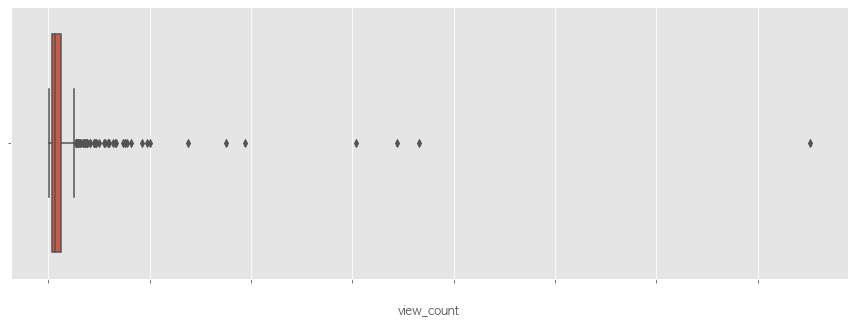

In [83]:
# pre_df load
pre_df = pd.read_csv("../../4.데이터/preprocessing_data.csv")


# 조회수 boxplot
plt.figure(figsize = (15, 5))
plt.xticks(color = "white", fontsize = 15)
plt.yticks(color = "white", fontsize = 15)
sns.boxplot(pre_df["view_count"])

In [84]:
# 4분 위수 1, 3분위 수 구하기
quatile_25 = np.percentile(pre_df["view_count"], 25)
quatile_75 = np.percentile(pre_df["view_count"], 75)

# iqr
iqr = quatile_75 - quatile_25
# 이상치 처리 기준
highest = quatile_75 + (1.5 * iqr)

In [85]:
outlier_rem_df = pre_df[pre_df["view_count"] <= highest].reset_index(drop = True)

<AxesSubplot:xlabel='조회수', ylabel='갯수'>

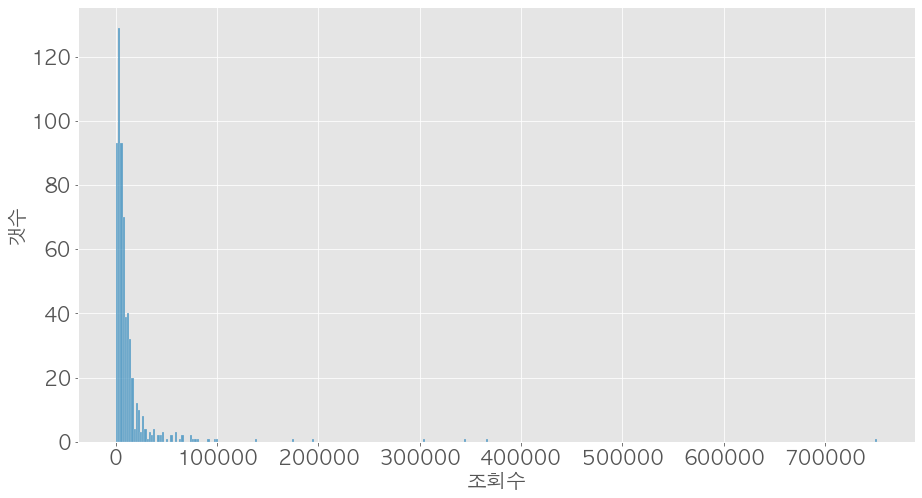

In [86]:
plt.figure(figsize = (15,8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("조회수", fontsize = 20)
plt.ylabel("갯수", fontsize = 20)
sns.histplot(pre_df["view_count"])

<AxesSubplot:xlabel='조회수', ylabel='좋아요수'>

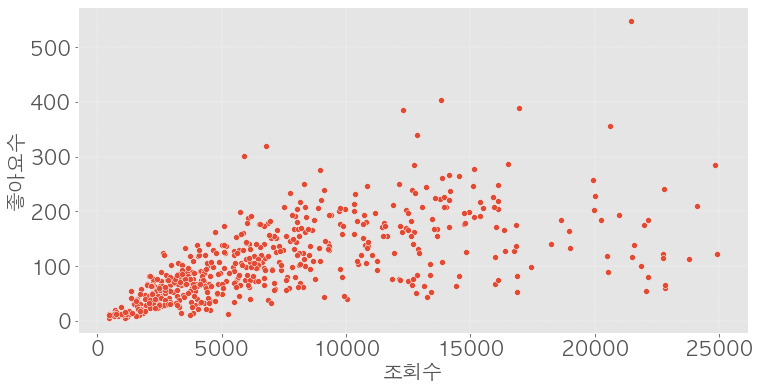

In [87]:
# plt.style.use("ggplot")
plt.figure(figsize = (12,6))
plt.grid(True, lw=0.4, ls='--')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("조회수", fontsize = 20)
plt.ylabel("좋아요수", fontsize = 20)
sns.scatterplot(x = "view_count", y = "likes", data=outlier_rem_df)

<AxesSubplot:>

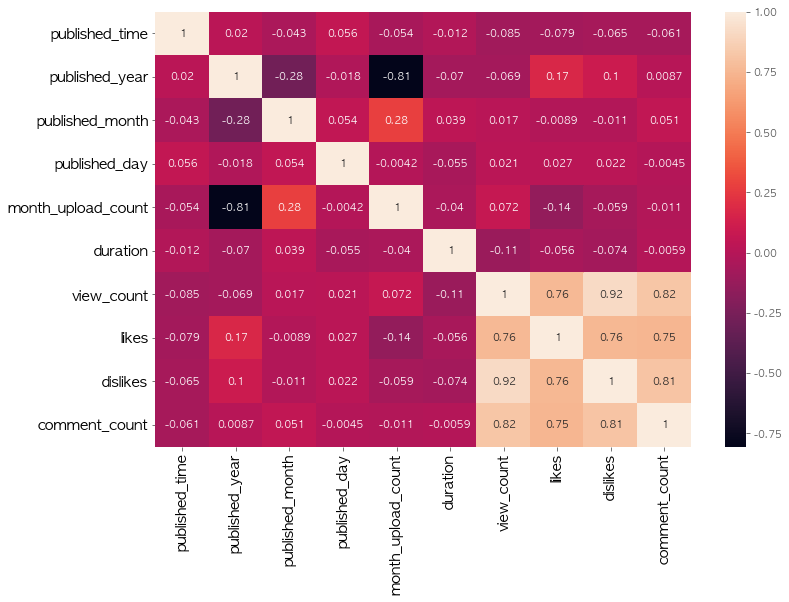

In [88]:
# 기존 df 상관분석
plt.figure(figsize = (12,8))
plt.xticks(color = "black", fontsize = 15)
plt.yticks(color = "black", fontsize = 15)
sns.heatmap(pre_df.corr(), annot = True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'published_time'),
  Text(1.5, 0, 'published_year'),
  Text(2.5, 0, 'published_month'),
  Text(3.5, 0, 'published_day'),
  Text(4.5, 0, 'month_upload_count'),
  Text(5.5, 0, 'duration'),
  Text(6.5, 0, 'view_count'),
  Text(7.5, 0, 'likes'),
  Text(8.5, 0, 'dislikes'),
  Text(9.5, 0, 'comment_count')])

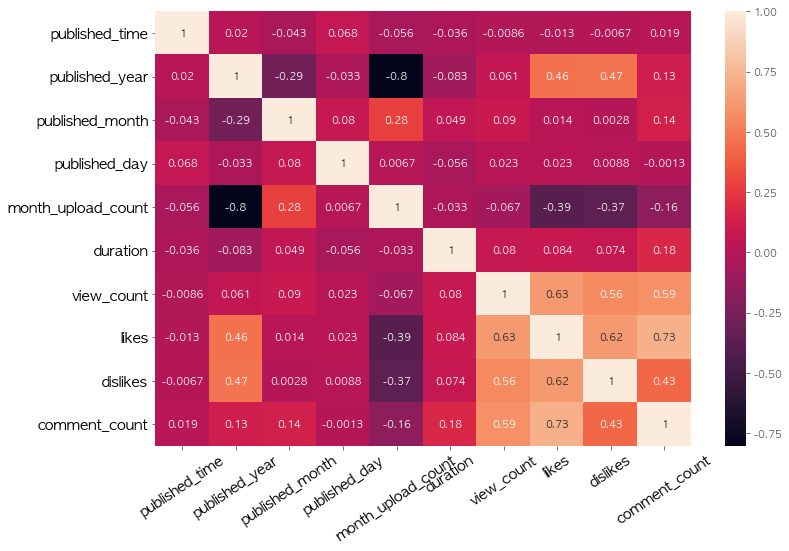

In [89]:
# 이상치 제거 상관분석
plt.figure(figsize = (12,8))

plt.yticks(color = "black", fontsize = 15)
sns.heatmap(outlier_rem_df.corr(), annot = True)
plt.xticks(color = "black", fontsize = 15, rotation = 34)

In [90]:
outlier_rem_df.groupby(["published_year", "published_month"])["view_count", "month_upload_count"].agg('mean').reset_index().corr()

,published_year,published_month,view_count,month_upload_count
published_year,1.000000,-0.365447,-0.279758,-0.864925
published_month,-0.365447,1.000000,0.167136,0.350325
view_count,-0.279758,0.167136,1.000000,0.230722
month_upload_count,-0.864925,0.350325,0.230722,1.000000


## 상관분석 결과
- 업로드 횟수랑 조회수의 상관은 크지 않다(약0.2이하)

In [91]:
# 댓글, 좋아요, 싫어요 결측치 가진 데이터 포인트 제거 df
use_df = outlier_rem_df[outlier_rem_df["comment_count"].notnull()].reset_index(drop = True)

## 연도별 평균 조회수
- 18년도까지 평균 조회수가 증가 하고 19년도 부터 급격히 감소
- 히스토그램을 통해 확인

Text(0, 0.5, '평균 조회수')

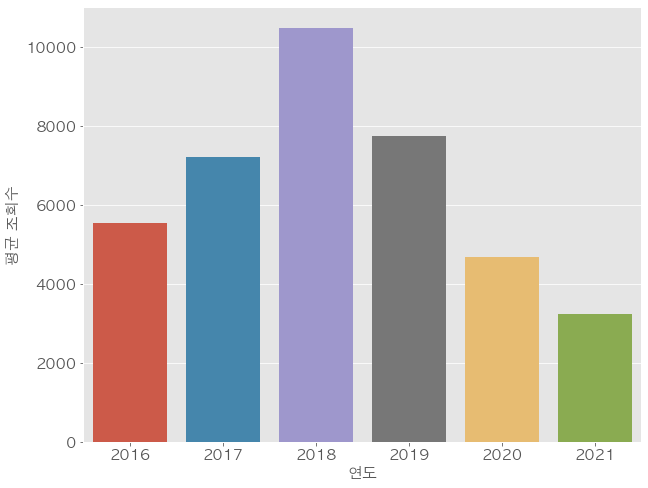

In [34]:
year_view_df = use_df.groupby("published_year")["view_count"].agg("mean").reset_index()

plt.figure(figsize=(10,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.barplot(x = "published_year", y = "view_count", data=year_view_df)
plt.xlabel("연도", fontsize = 15)
plt.ylabel("평균 조회수", fontsize = 15)

## 연도별 histogram
- 16, 17년도는 정적편포를 보인다.
- 18년도는 정규분포와 가장 비슷하다.(So, 이상치가 없으므로 18년도를 기준을 삼고 문제를 해결해도 좋을 듯)
- 19, 20년도는 정적편포를 보인다, 최대 조회수도 이전년도보다 작음
- 21년도는 따로 그려봐야 되지만 정규분포와 비슷하다.(So, 확실히 평균 조회수가 떨어짐)

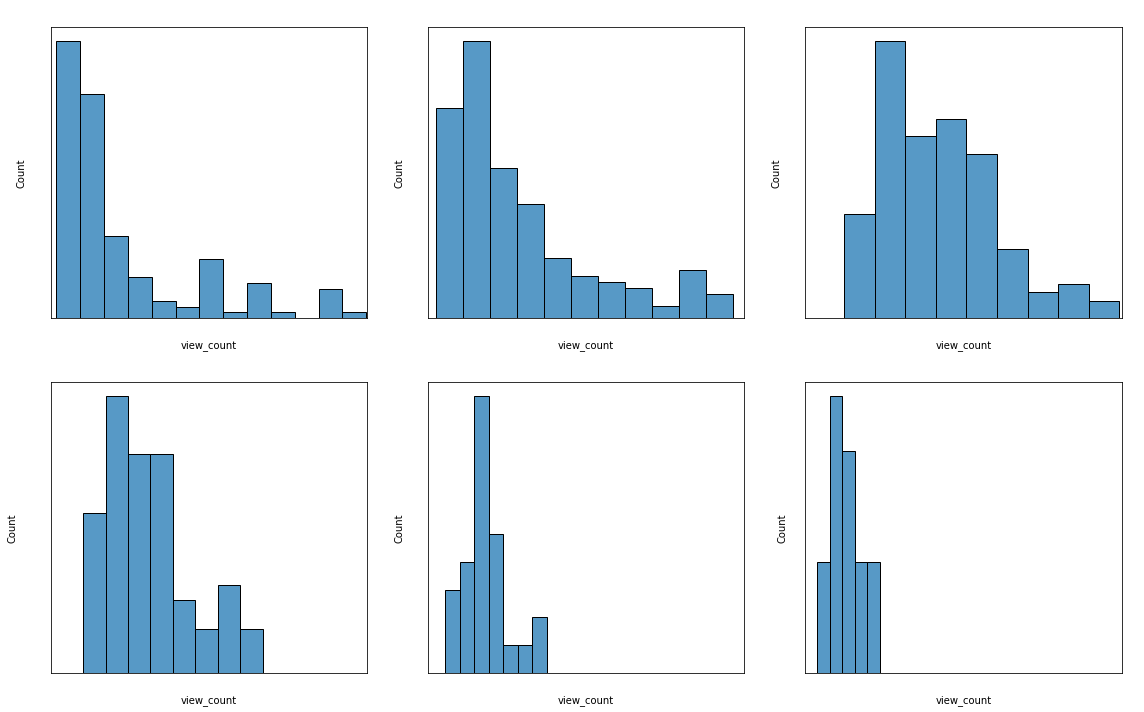

In [9]:
# 연도 리스트
a = use_df["published_year"].unique()
a.sort()

# 시각화
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (16,10))

for idx, column in enumerate(a):
    if idx < 3:
        row = 0
    else:
        row = 1
    col = idx % 3
    axs[row][col].set_title(f'{column}', fontdict = {'fontsize':20,
                                                    "fontweight":"bold",
                                                    "color":"white"})
    axs[row][col].set_xlim([0, 25000])
    axs[row][col].tick_params(colors = "white")
    sns.histplot(use_df[use_df["published_year"] == column]["view_count"], ax = axs[row][col])
    fig.tight_layout()

## 조회수 라인 그래프

In [36]:
line_df = use_df.groupby(["published_year", "published_month"])["view_count"].agg("mean").reset_index()
line_df["published_year"] = line_df["published_year"].astype("str")

def change_day_to_str(x):
    if x < 10:
        a = "0" + str(x)
    else:
        a = str(x)
    return a

line_df["published_month"] = line_df["published_month"].apply(lambda x: change_day_to_str(x))

In [37]:
line_df["group"] = line_df["published_year"] + line_df["published_month"]

In [38]:
# 시사점
# 2018년 2, 10월 조회수가 높은 이유 확인필요
# 2019년 4, 5월이 다른 달 보다 높은 확인필요
line_df.sort_values(by = "view_count", ascending = False).head(15)

,published_year,published_month,view_count,group
21,2018,02,14387.200000,201802
29,2018,10,14308.666667,201810
20,2018,01,12151.375000,201801
27,2018,08,10877.923077,201808
17,2017,10,10745.090909,201710
25,2018,06,10590.307692,201806
23,2018,04,10542.888889,201804
30,2018,11,10310.000000,201811
35,2019,04,10210.571429,201904
36,2019,05,9970.400000,201905


Text(0, 0.5, '월별 평균 조회수')

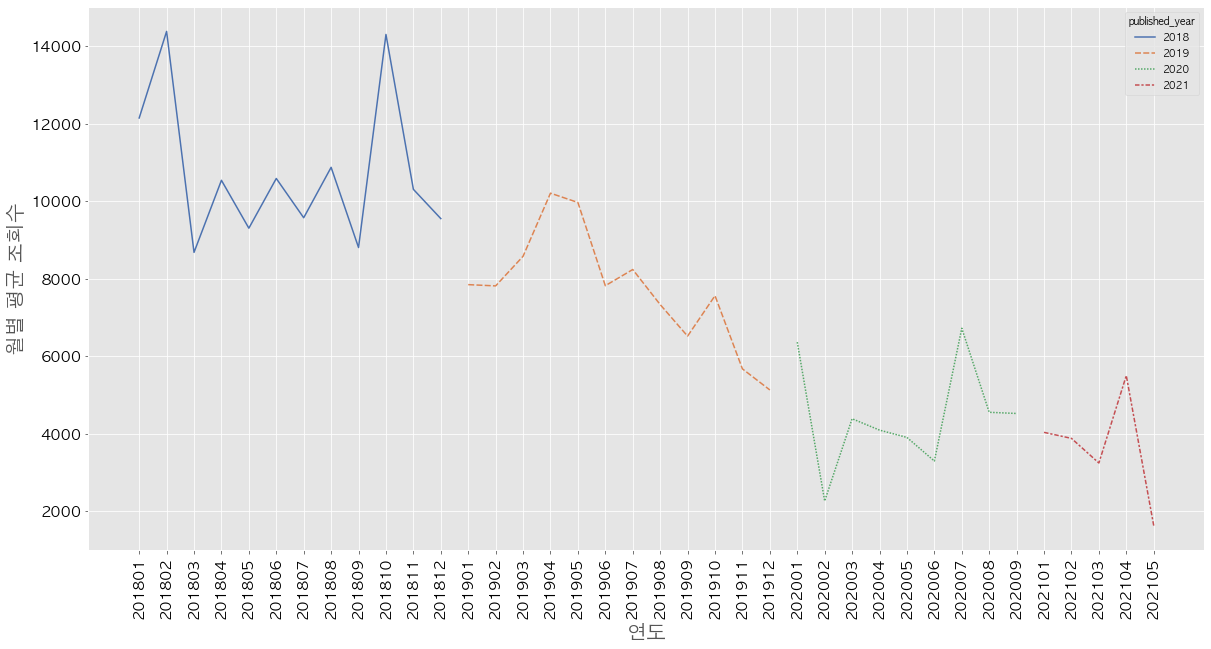

In [44]:
line_df["published_year"] = line_df["published_year"].astype("int")
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90, color = "black", fontsize = 15)
plt.yticks(color = "black", fontsize = 15)
sns.lineplot(x = "group", y = "view_count", data = line_df[line_df["published_year"] >= 2018], 
             style = "published_year", hue = "published_year", palette = "deep")
plt.xlabel("연도", fontsize = 20)
plt.ylabel("월별 평균 조회수", fontsize = 20)

## line graph 시사점 확인

In [78]:
use_df.sort_values(by = "view_count", ascending = False)["title"]

426            인바디 측정대중량 측정 일상 파워리프팅 vlog 복학생 ep
238                 스쿼트와 데드리프트하는 사람이라면 알아야 하는 꿀팁
245                  언더아머를 입기 위한 발악 도전 성공 운동vlog
288                          대학생 몸무게 kg 스쿼트 kg 회
480              가슴 커지는법  가슴 자극 운동대운동 집중 여름방학 ep
                         ...                    
537              가슴운동 chest day  physique update
512                   바디체크 스쿼트leg day 경희대고시생활 ep
527    chestday가슴운동 physique updates 경희대고시생활 ep 
539                     all round workouts 전신운동 
526      일요일 허리 하체 강화sunday workouts 경희대고시생활 ep 
Name: title, Length: 544, dtype: object

In [79]:
use_df[(use_df["published_year"] == 2018) & 
       (use_df["published_month"] == 2)].sort_values(by = "view_count", ascending = False)

,title,published_at,published_time,published_year,published_month,published_day,month_upload_count,duration,view_count,likes,dislikes,comment_count,description,tags,comments,upload_group
229,부모님께 첫월급으로 선물을 드렸습니다 직장인 ep,2018-02-25,12,2018,2,25,5,935,16970,388.0,7.0,153.0,안녕하세요 경돼입니다.\r\n오늘은 첫 월급을 받아서 부모님께 첫 선물을 드려봤어요...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,부모님,첫 월급,첫월급,첫선물,선물,...",['썸네일 관련 영상은 10:33 부터 입니다! 모두 새로운 한주 화이팅 하세요!'...,1
230,년 만에 대학교 졸업하다 직장인ep,2018-02-18,6,2018,2,18,5,796,15385,191.0,8.0,66.0,2011년 3월 입학 후 2018년 2월 졸업\r\n\r\n\r\n\r\n-----...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,대학교 졸업,대학졸업,경희대학교,경돼...",['화질문제로 재업로드 했습니다! 모두 새해 복 많이 받으세요! 좋아요&구독도 부탁...,1
232,동생과 함께한 가슴 운동 그리고 언더아머에서의 연락 직장인 ep,2018-02-04,8,2018,2,4,5,619,14123,172.0,7.0,68.0,안녕하세요 경돼입니다!\r\n직장인 에피소드3으로 찾아왔어요 ㅎㅎ\r\n주말 모두 ...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,언더아머,운동복,동생,가슴 운동,가슴...",['씨름할때 경돼님 하체...좋네요(확실히 탄탄하고 탄력있어 보였네요~ㅎㅎ) \n근...,1
231,본격 홈트 시작 새로운 아이템 직장인 ep,2018-02-11,16,2018,2,11,5,645,12757,233.0,10.0,114.0,안녕하세요 경돼입니다!\r\n본격 홈트레이닝의 시작입니다 ㅎㅎ\r\n여러분도 모두 ...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,홈트,홈트 시작,새로운,아이템,뉴 아...","['경돼님 회사 출근하실때 토드백 메시나요 아니면 백팩 메시나요 ?', '월요일.....",1
233,직장 생활 오랜만에 유도 영상,2018-02-03,14,2018,2,3,5,781,12701,140.0,3.0,24.0,안녕하세요 경돼입니다!\r\n오랜만에 영상으로 찾아뵙네요 ㅎㅎ\r\n\r\n모두 추...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,직장인,직장 생활,오랜만에,유도,유도...","['아니 이행님 힘 장난아니네 기울기도 제대로 안되어있는데 걍 뽑아버리네😲😲😲', ...",1


In [84]:
use_df.groupby("published_year")["month_upload_count"].agg("mean")

published_year
2016    19.266667
2017    15.880240
2018    12.822581
2019     8.090909
2020     4.230769
2021     3.400000
Name: month_upload_count, dtype: float64

## 분석 방향
- 18년도의 유저반응과 21년도의 유저반응 비교
- 18, 21년도의 콘텐츠 비교

In [ ]:
func = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'
def comment_preprocessing(x):
    twitter = Twitter()
    a = twitter.nouns(x)
    a = " ".join(a)
    return a

def text_preprocessing(x):
    func = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'
    a = re.sub(func, "", str(x))
    a = re.sub("[0-9]", "", a)
    a = a.replace("\\n", "")
    # │는 |랑 다른 특수기호라 직접 추출
    a = a.replace("│", " ")
    a = a.lower()

    return a

use_df["title"] = use_df["title"].apply(lambda x: text_preprocessing(x))
use_df["comments"] = use_df["comments"].apply(lambda x: comment_preprocessing(x))

In [53]:
df18 = use_df[use_df["published_year"] == 2018].reset_index(drop = True)
df19 = use_df[use_df["published_year"] == 2019].reset_index(drop = True)
df21 = use_df[use_df["published_year"] == 2021].reset_index(drop = True)

## 18년도 분석

[('운동', 12), ('그리고', 9), ('VLOG', 5), ('새로운', 5), ('썸머슈레딩', 5), ('함께', 4), ('100kg', 4), ('│썸머슈레딩', 4), ('유도', 4), ('벤치프레스', 4)]


(-0.5, 499.5, 399.5, -0.5)

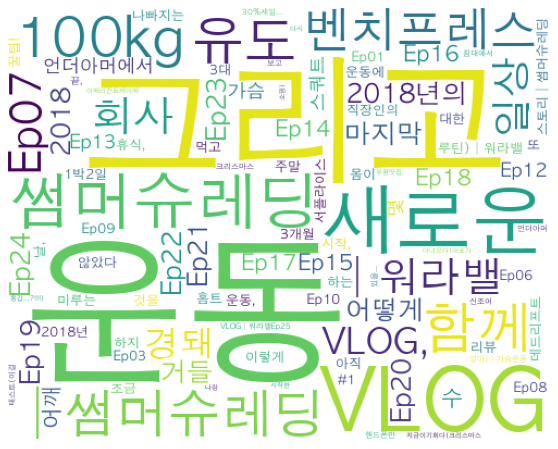

In [20]:
title18 = {}

for sentence in df18["title"]:
    lst = sentence.split(" ")
    for text in lst:
        title18[text] = title18.get(text, 0) + 1
        
word_count = Counter(title18)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(title18)
plt.imshow(wc_result)
plt.axis("off")

[('', 705), ("'경돼님", 612), ('경돼님', 321), ('영상', 311), ('너무', 263), ('잘', 236), ('항상', 200), ('더', 183), ("'형", 180), ('많이', 170)]


(-0.5, 499.5, 399.5, -0.5)

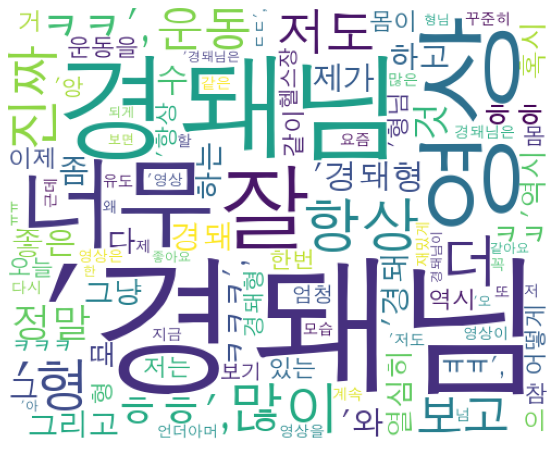

In [26]:
comment18 = {}

for sentence in df18["comments"]:
    lst = sentence.split(" ")
    for text in lst:
        comment18[text] = comment18.get(text, 0) + 1
        
word_count = Counter(comment18)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(comment18)
plt.imshow(wc_result)
plt.axis("off")

In [19]:
from konlpy.tag import Twitter

In [ ]:
twitter = Twitter()
twitter.nouns(df18["comments"][0])

## 19년도 분석

[('다이어트', 9), ('운동', 8), ('VLOG', 6), ('회사원', 6), ('벤치프레스', 5), ('직장인', 4), ('100kg', 4), ('│윈터슈레딩', 3), ('VLOG,', 3), ('할', 3)]


(-0.5, 499.5, 399.5, -0.5)

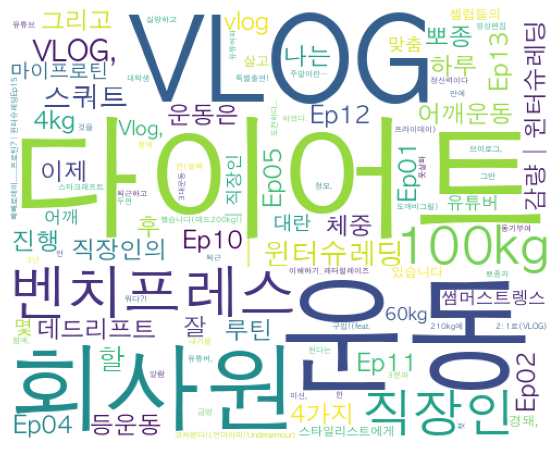

In [24]:
title19 = {}

for sentence in df19["title"]:
    lst = sentence.split(" ")
    for text in lst:
        title19[text] = title19.get(text, 0) + 1
        
word_count = Counter(title19)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(title19)
plt.imshow(wc_result)
plt.axis("off")

[('', 234), ("'경돼님", 157), ("'형", 113), ('너무', 103), ('영상', 94), ("'경돼형", 90), ('더', 89), ('잘', 86), ('경돼님', 72), ('많이', 72)]


(-0.5, 499.5, 399.5, -0.5)

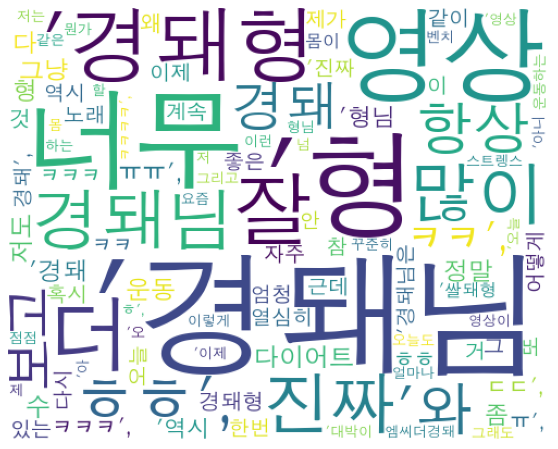

In [25]:
comment19 = {}

for sentence in df19["comments"]:
    lst = sentence.split(" ")
    for text in lst:
        comment19[text] = comment19.get(text, 0) + 1
        
word_count = Counter(comment19)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(comment19)
plt.imshow(wc_result)
plt.axis("off")

## 21년도 분석

[('kg', 5), ('', 2), ('도와ㅜ줘', 2), ('벤치프레스', 2), ('것', 2), ('유도', 2), ('회', 1), ('실화', 1), ('아이템', 1), ('착용', 1)]


(-0.5, 499.5, 399.5, -0.5)

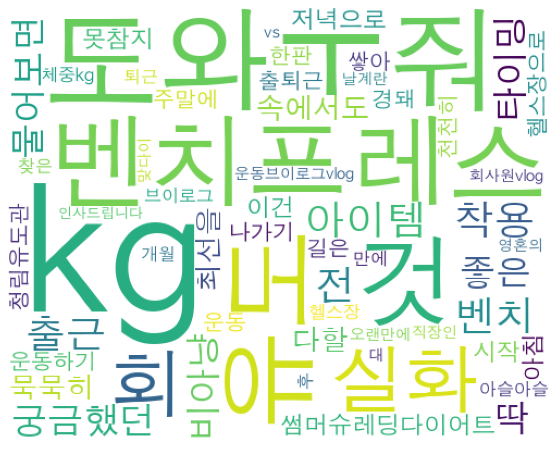

In [116]:
title21 = {}

for sentence in df21["title"]:
    lst = sentence.split(" ")
    for text in lst:
        title21[text] = title21.get(text, 0) + 1
        
word_count = Counter(title21)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(title21)
plt.imshow(wc_result)
plt.axis("off")

[('경', 80), ('영상', 73), ('돼', 72), ('형', 69), ('진짜', 38), ('몸', 33), ('운동', 27), ('더', 27), ('형님', 25), ('항상', 25)]


(-0.5, 499.5, 399.5, -0.5)

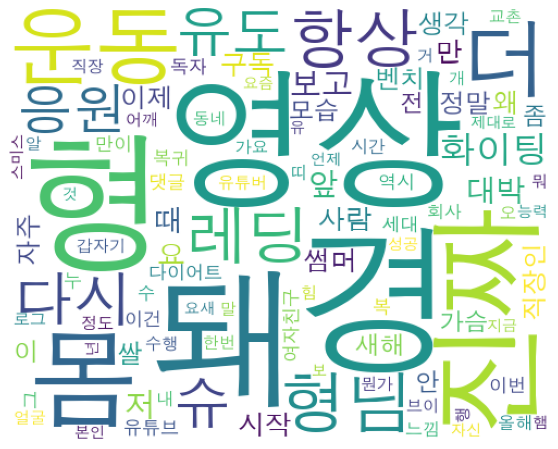

In [114]:
comment21 = {}

for sentence in df21["comments"]:
    lst = sentence.split(" ")
    for text in lst:
        comment21[text] = comment21.get(text, 0) + 1
        
word_count = Counter(comment21)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf", 
               width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(comment21)
plt.imshow(wc_result)
plt.axis("off")

In [ ]:
df18.sort_values("view_count",ascending = False).head(15)

## 18 vs 19

<AxesSubplot:title={'center':'18 VS 19 영상 갯수'}, xlabel='published_year', ylabel='view_count'>

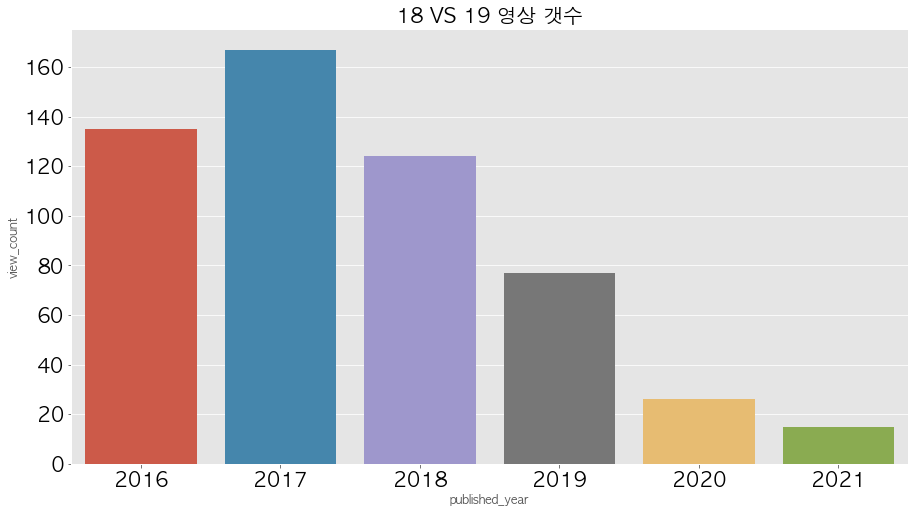

In [97]:
a = use_df.groupby("published_year")["view_count"].agg("count").reset_index()

plt.figure(figsize = (15, 8))
plt.title("18 VS 19 영상 갯수", fontsize = 20, color = "black")
plt.xticks(color = "black", fontsize = 20)
plt.yticks(color = "black", fontsize = 20)
sns.barplot(x = "published_year", y = "view_count", data = a)

Text(0, 0.5, '월 평균 업로드 횟수')

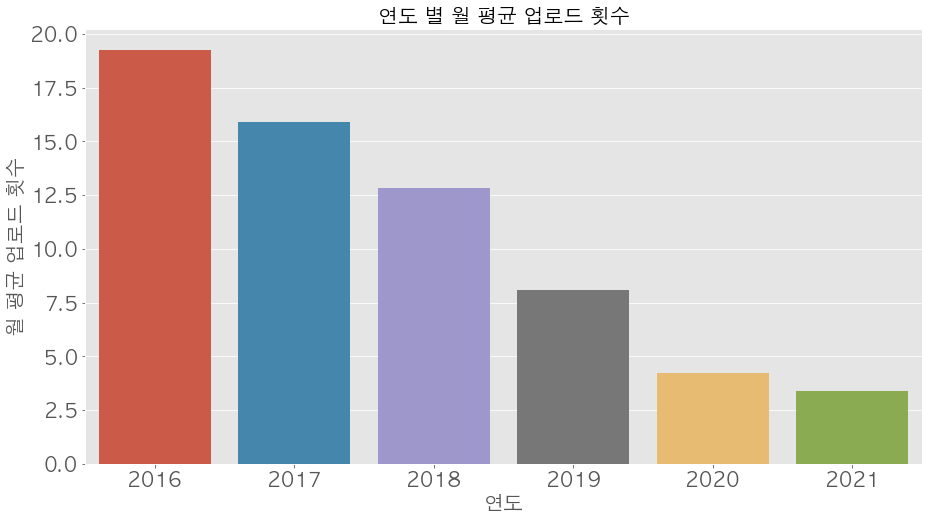

In [46]:
a = use_df.groupby("published_year")["month_upload_count"].agg("mean").reset_index()

plt.figure(figsize = (15, 8))
plt.title("연도 별 월 평균 업로드 횟수", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks( fontsize = 20)
sns.barplot(x = "published_year", y = "month_upload_count", data = a)
plt.xlabel("연도", fontsize = 20)
plt.ylabel("월 평균 업로드 횟수", fontsize = 20)

In [54]:
from scipy import stats

t, p = stats.ttest_ind(df18["view_count"], df19["view_count"])
if p < 0.05:
    print("18년도와 19년도의 조회수는 통계적으로 유의한 차이가 있다")

18년도와 19년도의 조회수는 통계적으로 유의한 차이가 있다


In [55]:
use_df["upload_group"] = use_df["month_upload_count"].apply(lambda x: 1 if x > 4 else 0)

In [56]:
month1 = use_df[use_df["month_upload_count"] > 4].reset_index(drop = True)
month2 = use_df[use_df["month_upload_count"] <= 4].reset_index(drop = True)

stats.ttest_ind(month1["view_count"], month2["view_count"])

Ttest_indResult(statistic=3.327403901167869, pvalue=0.0009360550353104696)

Text(0, 0.5, '평균 조회수')

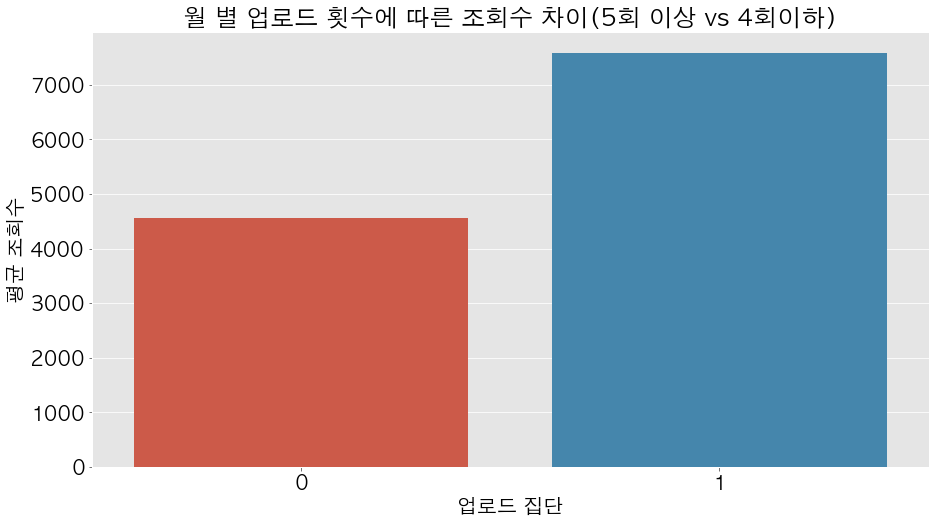

In [65]:
a = use_df.groupby("upload_group")["view_count"].agg("mean").reset_index()

# plt.style.use("ggplot")
plt.figure(figsize = (15, 8))
plt.title("월 별 업로드 횟수에 따른 조회수 차이(5회 이상 vs 4회이하)", fontsize = 24)
plt.xticks(fontsize = 20, color = "black")
plt.yticks(fontsize = 20, color = "black")
sns.barplot(x = "upload_group", y = "view_count", data = a)
plt.xlabel("업로드 집단", fontsize = 20, color = "black")
plt.ylabel("평균 조회수", fontsize = 20, color = "black")

- 업로드 횟수에 따른 조회수에 차이는 없지만 업로드 집단별 차이가 있다.
- 5회이상이 4회이하 보다 평균 조회수가 높으므로 주당 1개 이상의 영상 업로드가 필요

In [100]:
df18.sort_values("view_count", ascending = False).head(5)

,title,published_at,published_time,published_year,published_month,published_day,month_upload_count,duration,view_count,likes,dislikes,comment_count,description,tags,comments
120,스쿼트와 데드리프트하는 사람이라면 알아야 하는 꿀팁!,2018-01-09,9,2018,1,9,13,671,24816,285.0,11.0,135.0,----------------------------------------------...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,스쿼트,데드리프트,꿀팁,운동 꿀팁,운...","['브금....초사이언인가요 ㅋㅋㅋ', '역시 갓브금 드래곤볼 ㅠ마음을울린다', '..."
26,스윙스의 짐티피를 다녀오다!(벤치프레스 대결),2018-10-16,11,2018,10,16,12,551,22790,241.0,14.0,76.0,"여러분 안녕하세요 경돼입니다.\r\n\r\n먼저, 저에게 연락을 준 UFBB 구성원...","경돼,스트렝스,스트렝스 훈련,운동vlog,a6500,소니,운동유튜버,UFBB,대학바...","['노슴찍 ㄴㅇㅈ', '벤치프레스 무게 말할때 바 무게도 포함하는거에요, 원판 무게..."
118,100kg 이제는 몇개 가능할까???? 운동VLOG,2018-01-13,16,2018,1,13,13,516,21995,175.0,20.0,92.0,----------------------------------------------...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,벤치프레스,100kg,몇개,도전,스트...","['100kg면 봉무게 포함인가요??', '100개 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 미..."
92,운동에 조급해 하지 않아도 된다. 그저 즐길 뿐(경돼어트),2018-05-07,11,2018,5,7,16,227,21437,547.0,15.0,248.0,여러분 안녕하세요 경돼입니다.\r\n--------------------------...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...",['내가 이 영상을 왜 이제 봤지...ㅜㅜ\n진짜 명언 그 자체입니다ㄷㄷㅜㅜ\n운동...
97,키다리형 VS 경돼 벤치프레스 대결!!,2018-04-23,14,2018,4,23,11,327,20237,185.0,20.0,98.0,여러분 안녕하세요 경돼입니다.\r\n키다리형과의 벤치프레스 대결! 1편\r\n재밌게...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...",['유튜브를 시작하기 전부터 경돼님 영상을 즐겨보다가 저도 약소하지만 유튜브를 시작...


In [102]:
df19.sort_values(by = "view_count", ascending = False).head(5)

,title,published_at,published_time,published_year,published_month,published_day,month_upload_count,duration,view_count,likes,dislikes,comment_count,description,tags,comments
35,115kg Benchpress 몇 개 할 수 있을까?,2019-08-05,13,2019,8,5,15,47,16741,127.0,5.0,58.0,벤치프레스 115kg 정자세로 몇개 했을까요???\r\n\r\n*마이프로틴 구매 링...,"벤치프레스,경돼,스트렝스,정자세,benchpress,115kg,howmanybenc...","['썸리스그립위험한데조심하십쇼 ㅠ', '내가 숨을못쉬겟네..', '벤치중량 올리는거..."
38,"벤치프레스 증량 꿀팁(벤치프레스 중량하는법, 140kg)",2019-07-28,5,2019,7,28,6,452,16517,286.0,15.0,49.0,여러분 안녕하세요 경돼입니다.\r\n\r\n8개월 동안 진행했던 저의 벤치프레스 증...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,썸머스트렝스,경돼 벤치프...","['경돼형님 팬 입니다 ㅋㅋ', '멋지네요 \n인상도 좋으시고 140대단합니다\n..."
60,다이어트는 무슨... 몸이나 키우자!│터보소닉 진공 블렌더,2019-04-06,10,2019,4,6,7,626,15112,246.0,14.0,123.0,여러분 안녕하세요 경돼입니다.\r\n\r\n회사 동기인 안경잽이 님의 결혼식에 다녀...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,다이어트,무슨,몸이나 키...","['취업전 직장선배들이 여가생활을 어떻게 보내는지 잘 보여주는 영상 같네요ㅎ', '..."
59,"회사원 VLOG, 처참히 줄어든 중량.... 회복하자",2019-04-13,8,2019,4,13,7,697,14961,199.0,13.0,67.0,여러분 안녕하세요 경돼입니다.\r\n\r\nDan이라는 새로운 운동 파트너와 함께 ...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,회사원 vlog,회사원,...","['ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 아 대박이 반응하는거 너무 신기하고 귀엽네요', '진짜 운..."
63,오랜만입니다. 벤치프레스 60kg 몇개 하세요?!│짐박스(GYMBOXX),2019-03-23,5,2019,3,23,5,784,13955,227.0,12.0,61.0,여러분 안녕하세요 경돼입니다.\r\n\r\n오랜만에 찾아왔습니다!\r\n\r\n\r...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,짐박스,gymboxx,경...",['질문: 여자친구는?\n답변: 있습니다.!\n.......................


In [92]:
def title_pre(x):
    a = x.split("│")
    if len(a) > 1:
        result = a[1]
        result = result.lower()
        result = result.replace("vlog", "브이로그")
        result = re.findall("[가-힣]{1,}", result)
        result = " ".join(result)
    else:
        result = ""
    return result
    
use_df["contents"] = use_df["title"].apply(lambda x: title_pre(x))

In [93]:
use_df["contents"].value_counts()

                 360
썸머슈레딩             38
워라밸               22
윈터슈레딩             14
썸머스트렝스             7
                ... 
터보소닉 진공 블렌더        1
칠리 송년회             1
텐진호르몬 돈키호테 먹방      1
경돼일기               1
유후인 온천 찾기          1
Name: contents, Length: 84, dtype: int64

In [102]:
content1 = use_df[use_df["contents"] == ""]
content2 = use_df[use_df["contents"] != ""]

stats.mannwhitneyu(content1["view_count"], content2["view_count"])

MannwhitneyuResult(statistic=25526.5, pvalue=5.997003461344411e-06)

In [95]:
content1["view_count"].mean(), content2["view_count"].mean()

(6936.108333333334, 8282.58152173913)

<AxesSubplot:title={'center':'컨텐츠 유무에 따른 조휘수 차이'}, xlabel='컨텐츠_유무', ylabel='평균_조회수'>

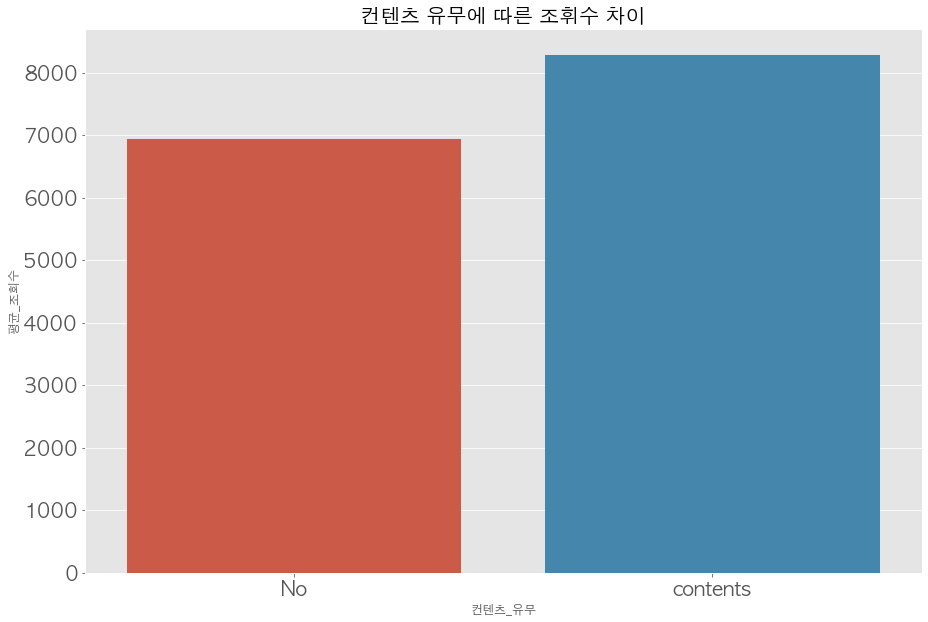

In [96]:
use_df["contents_group"] = use_df["contents"].apply(lambda x: "No" if x == "" else "contents")
a = use_df.groupby("contents_group")["view_count"].agg("mean").reset_index()
a = a.rename({"view_count":"평균_조회수", "contents_group":"컨텐츠_유무"}, axis = 1)

plt.figure(figsize = (15, 10))
plt.title("컨텐츠 유무에 따른 조휘수 차이", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(x = "컨텐츠_유무", y = "평균_조회수", data = a)

Text(0, 0.5, '조회수')

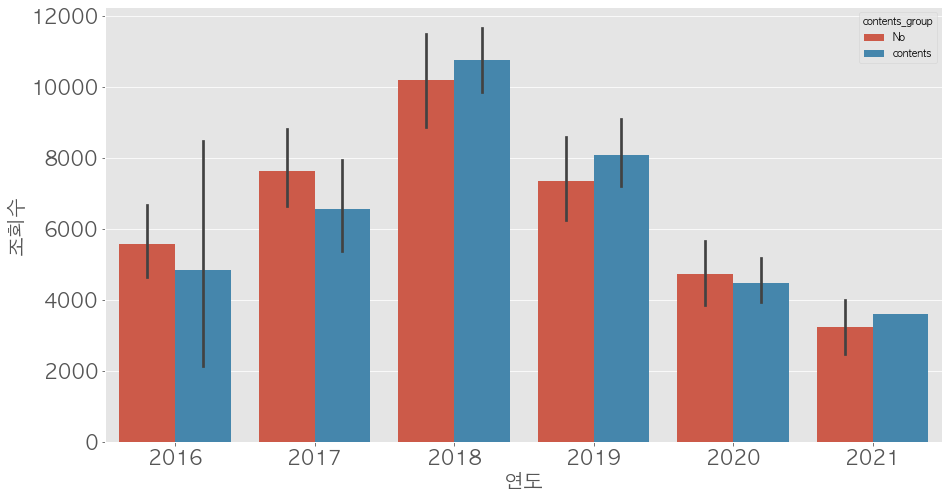

In [108]:
plt.figure(figsize = (15,8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(x = "published_year", y = "view_count", data = use_df,
           hue = "contents_group")
plt.xlabel("연도", fontsize = 20)
plt.ylabel("조회수", fontsize = 20)

In [101]:
stats.shapiro(use_df["view_count"])

ShapiroResult(statistic=0.8984043002128601, pvalue=1.5898387591826581e-18)

In [100]:
use_df[use_df["published_year"] == 2016].groupby("contents_group").agg("mean")

,published_time,published_year,published_month,published_day,month_upload_count,duration,view_count,likes,dislikes,comment_count
contents_group,,,,,,,,,,
No,9.75969,2016.0,8.255814,16.139535,19.286822,515.829457,5578.186047,39.627907,2.054264,38.627907
contents,9.00000,2016.0,8.833333,24.166667,18.833333,770.000000,4828.166667,37.833333,1.666667,48.000000


In [148]:
use_df[use_df["contents"] == '썸머슈레딩'].sort_values("view_count", ascending = False)

,title,published_at,published_time,published_year,published_month,published_day,month_upload_count,duration,view_count,likes,dislikes,comment_count,description,tags,comments,upload_group,contents,contents_group
335,데드리프트 190kg 가능?! with 데드리프트 소녀│썸머슈레딩 Ep39,2017-06-24,16,2017,6,24,13,239,21572,138.0,11.0,104.0,데드리프트 소녀와 함께 카페 그리고 헬스 타임을 가졌습니다.\r\n그리고 컨벤셔널 ...,"데드리프트,고중량,스트렝스,스트랭스,3대중량,3대훈련,3대운동,헬스,저중량,썸머슈레...","['치의예과.... ㄷㄷ', '1rm 도전하는데 자세가 되게 깔끔하심 굿!', '오...",1,썸머슈레딩,contents
192,주짓수와 웨이트!? 새로운 다짐 │썸머슈레딩 Ep15,2018-06-10,1,2018,6,10,14,870,20016,228.0,10.0,88.0,여러분 안녕하세요 경돼입니다.\r\n주짓수를 시작했습니다.\r\n시간 때문에 많이 ...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...",['경돼님 웨이트 없이 못 사는 사람이 주짓수 부상없이 하면서 웨이트랑 병행 가능하...,1,썸머슈레딩,contents
186,"코스트코(Costco)에 대한 한마디, 퇴근 후 운동 VLOG │썸머슈레딩 Ep19",2018-06-30,1,2018,6,30,14,535,19928,257.0,15.0,130.0,여러분 안녕하세요 경돼입니다.\r\n코스트코 갔다 온 영상을 궁금해 하시는 분들이 ...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...",['코스트코가면 오히려 과소비하게 됩니다. 필요하지도 않는데 사게돼요. 낱개로 파는...,1,썸머슈레딩,contents
207,서플라이스 그립으로 200kg 도전하다!?│썸머슈레딩 Ep11,2018-05-19,10,2018,5,19,16,649,18958,164.0,22.0,83.0,여러분 안녕하세요 경돼입니다.\r\n썸머슈레딩 Ep11편에 오신 것을 환영합니다.\...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...",['저도 이거 사용해봤는데 아니 워밍업으로 돌리는 140데드에서도 풀려버려요. 물건...,1,썸머슈레딩,contents
211,"직장인, 새로운 정장을 구입했을 뿐│썸머슈레딩 Ep09",2018-05-06,15,2018,5,6,16,1035,16125,218.0,8.0,133.0,여러분 안녕하세요 경돼입니다.\r\n썸머슈레딩 에피소드 9편에 오신 것을 환영합니다...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...","['광주 세정 아울렛점 졸 비쌈', '188인줄 알았는데??\n168??????ㄹㅇ...",1,썸머슈레딩,contents
187,"스트렝스충의 간헐적(!?) 홈트, 30분 변화│썸머슈레딩 Ep18",2018-06-25,11,2018,6,25,14,447,15494,206.0,8.0,117.0,여러분 안녕하세요 경돼입니다.\r\n덤벨랩(Dumbell Lab)이라는 새로운 홈짐...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...","['무게에 맞게 운동하듯.\n옥타브에 맞게 노래하시길', 'ㅎㅎ 확실히 펌핑이 되어...",1,썸머슈레딩,contents
163,벌써 예비군 5년!? 데드리프트 없는 등운동 루틴│썸머슈레딩 Ep33,2018-08-19,5,2018,8,19,17,492,15134,189.0,18.0,115.0,여러분 안녕하세요 경돼입니다.\r\n예비군 벌써 5년차네요...ㅎㅎ 시간 정말 빨리...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...","['필승 해병공수 218차 입니다', '해병대때 안경 끼고 훈련 받으셨나요', '...",1,썸머슈레딩,contents
181,"일요일 최고의 휴식, 홈트레이닝│썸머슈레딩 Ep21",2018-07-08,14,2018,7,8,13,393,14009,208.0,10.0,133.0,여러분 안녕하세요 경돼입니다.\r\n일요일 휴식 vlog 함께 하시죠!\r\n\r\...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...","['젖꼭지 되게 예쁘시네', '잘 보고 있어요 \n덤벨은 덤벨랩인가요? 홈트로 하...",1,썸머슈레딩,contents
190,"경돼 x 말왕, 유도대결! 비하인드 스토리│썸머슈레딩 Ep16",2018-06-16,0,2018,6,16,14,528,13212,245.0,7.0,57.0,여러분 안녕하세요 경돼입니다.\r\n말왕님과의 합방 영상을 담아봤습니다.\r\n재밌...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...","['썸머슈레딩은 무슨뜻이에요?', '경돼님카메라에 말왕형나오는데왜케 잘생기게나오냐 ...",1,썸머슈레딩,contents
177,코스트코 또 갔음... Oh My Money│썸머슈레딩 Ep25,2018-07-22,11,2018,7,22,13,460,13062,207.0,7.0,62.0,여러분 안녕하세요 경돼입니다.\r\n코스트코 또 갔다 왔어요.\r\n역시 코스트코에...,"경돼,스트렝스,파나소닉,lx10,스트렝스 훈련,운동vlog,a6500,소니,운동유튜...","['ㅋㅋㅋㅋ점보맘보가 나올줄이야ㅎㅎㅎㅎ\n같은세대 동질감...', 'ㅠㅠㅠ 이렇게...",1,썸머슈레딩,contents


In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
a = use_df[use_df["contents"] != ''].sort_values("view_count", ascending = False).reset_index(drop = True)
cnt_vect = TfidfVectorizer()
cnt_vect.fit(a["title"])
x_cnt = cnt_vect.transform(a["title"])

In [206]:
b = pd.DataFrame(x_cnt.toarray(), columns = cnt_vect.get_feature_names())

In [207]:
b["view_count"] = a["view_count"]

In [208]:
linear = LinearRegression()
linear.fit(b.iloc[:,:-1], b.iloc[:,-1])

LinearRegression()

In [ ]:
pd.Series(linear.coef_, index = b.iloc[:,:-1].columns).sort_values(ascending = False).head(25)

In [213]:
use_df = use_df[use_df["contents"] != ''].reset_index(drop = True)

In [218]:
df1 = use_df[use_df["view_count"] >= 8000].reset_index(drop = True)
df2 = use_df[use_df["view_count"] < 8000].reset_index(drop = True)

[('ep', 71), ('', 49), ('썸머슈레딩', 41), ('vlog', 27), ('운동', 15), ('윈터슈레딩', 10), ('다이어트', 9), ('데드리프트', 9), ('훈련', 8), ('일상', 8)]


(-0.5, 499.5, 399.5, -0.5)

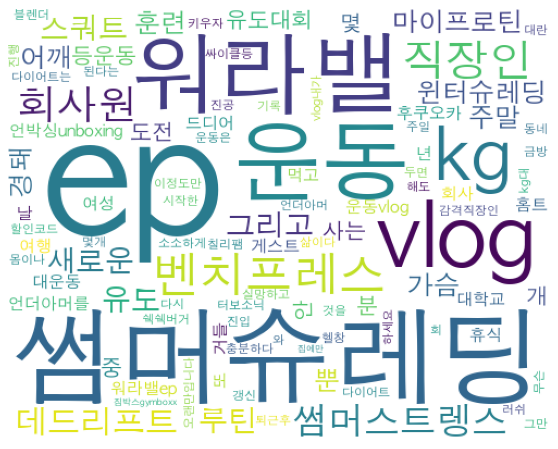

In [226]:
title1 = {}

for sentence in df1["title"]:
    lst = sentence.split(" ")
    for text in lst:
        title1[text] = title1.get(text, 0) + 1
        
word_count1 = Counter(title1)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(title1)
plt.imshow(wc_result)
plt.axis("off")

[('ep', 71), ('', 49), ('썸머슈레딩', 41), ('vlog', 27), ('운동', 15), ('윈터슈레딩', 10), ('다이어트', 9), ('데드리프트', 9), ('훈련', 8), ('일상', 8)]


(-0.5, 499.5, 399.5, -0.5)

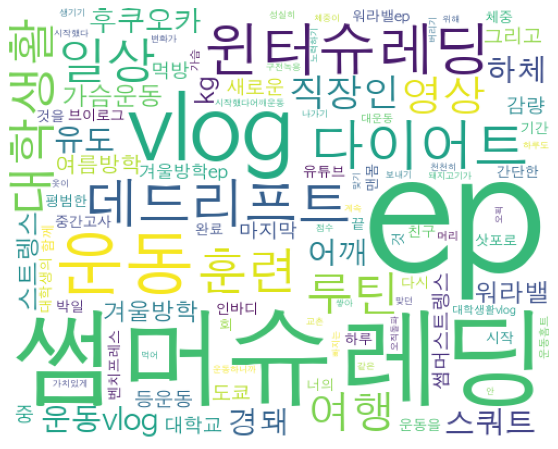

In [227]:
title2 = {}

for sentence in df2["title"]:
    lst = sentence.split(" ")
    for text in lst:
        title2[text] = title2.get(text, 0) + 1
        
word_count2 = Counter(title2)
top10_word = word_count.most_common(10)
print(top10_word)

wc = WordCloud(font_path = "/Library/Fonts/AppleGothic.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(title2)
plt.imshow(wc_result)
plt.axis("off")

In [225]:
from sklearn.preprocessing import StandardScaler

In [231]:
scaler = StandardScaler()
scaler.fit(pd.DataFrame(word_count1.values(), index = word_count1.keys()))
scaler.transform(pd.DataFrame(word_count1.values(), index = word_count1.keys()))

array([[-0.1879506 ],
       [-0.1879506 ],
       [-0.1879506 ],
       [-0.1879506 ],
       [ 0.05887609],
       [-0.1879506 ],
       [-0.1879506 ],
       [ 5.73588995],
       [ 0.30570278],
       [13.88117069],
       [-0.1879506 ],
       [-0.1879506 ],
       [-0.1879506 ],
       [-0.1879506 ],
       [-0.1879506 ],
       [ 0.05887609],
       [-0.1879506 ],
       [-0.1879506 ],
       [ 1.04618285],
       [-0.1879506 ],
       [ 3.51444974],
       [ 2.03348961],
       [-0.1879506 ],
       [ 0.05887609],
       [-0.1879506 ],
       [-0.1879506 ],
       [-0.1879506 ],
       [ 1.29300954],
       [ 0.55252947],
       [ 0.05887609],
       [ 0.30570278],
       [-0.1879506 ],
       [-0.1879506 ],
       [ 0.05887609],
       [ 3.76127643],
       [-0.1879506 ],
       [ 1.04618285],
       [ 1.53983623],
       [-0.1879506 ],
       [-0.1879506 ],
       [ 0.55252947],
       [ 0.55252947],
       [ 0.05887609],
       [ 0.05887609],
       [-0.1879506 ],
       [-0